In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea.nanoevents import NanoAODSchema
from coffea import processor
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
samples = [
   
    "2Mu2E_500GeV_5p0GeV_0p8mm",
    "2Mu2E_500GeV_5p0GeV_8p0mm",
    "2Mu2E_500GeV_5p0GeV_40p0mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",
    #"4Mu_500GeV_5p0GeV_0p08mm",
    #"4Mu_500GeV_5p0GeV_0p8mm",
    #"4Mu_500GeV_5p0GeV_40p0mm",
    #"4Mu_500GeV_5p0GeV_80p0mm",
    #"4Mu_500GeV_5p0GeV_8p0mm",

    
  
     "TTJets", 
    
]
fileset = utilities.make_fileset(samples[:-1], 
                                 "llpNanoAOD_v2", 
                                 location_cfg="signal_v6.yaml",
                                 max_files =10
                                 #max_files =1
                                )
fileset = utilities.make_fileset([samples[-1]], 
                                 "llpNanoAOD_v2",
                                 location_cfg="backgrounds.yaml",
                                fileset=fileset,
                                max_files =10, 
                                #max_files =1, 
                                )


runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    #maxchunks=2,
    skipbadfiles=True
)

channels = ["baseNoLj", 
            "base",
            "base_ljObjCut",
            "baseNoLj_noLoose"
           
           ]
p = sidm_processor.SidmProcessor(
    channels,
    ["egm_lj_base"],
    lj_reco_choices=["0.4"],
   
)

output = runner.run(fileset, treename="Events", processor_instance=p)


Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


In [3]:

def plot_histograms(samples, hist_list, channel, n, log = False):
    for h in range(len(histograms_list)):
        if h%n == 0:
            fig, ax = plt.subplots(1, n, figsize = (n*12, 10))
            plt.subplot(1, n, 1)
            for s in samples:
                hists = output["out"][s]["hists"]
                utilities.plot(hists[histograms_list[h]][channel,:],)
                plt.legend(samples)
                ax[0].set_title(channel)
                if log == True:
                    plt.yscale("log")
        else:
            plt.subplot(1, n, h%n+1)
            for s in samples:
                hists = output["out"][s]["hists"]
                utilities.plot(hists[histograms_list[h]][channel,:],)
                plt.legend(samples)
                if log == True:
                    plt.yscale("log")
                ax[h%n].set_title(channel)
def plot_channels(samples, channels, histogram, n , log=False):
    for h in range(len(channels)):
        if h%n == 0:
            fig, ax = plt.subplots(1, n, figsize = (n*12, 10))
            plt.subplot(1, n, 1)
            for s in samples:
                hists = output["out"][s]["hists"]
                utilities.plot(hists[histogram][channels[h],:],)
                plt.legend(samples)
                ax[0].set_title(channels[h])
                if log == True:
                    plt.yscale("log")
        else:
            plt.subplot(1, n, h%n+1)
            for s in samples:
                hists = output["out"][s]["hists"]
                utilities.plot(hists[histogram][channels[h],:],)
                plt.legend(samples)
                if log == True:
                    plt.yscale("log")
                ax[h%n].set_title(channels[h])
def eta_phi(samples, channel):
    fig, ax = plt.subplots(1, 2, figsize = (2*12, 10))

    plt.subplot(1, 2, 1)
    for s in samples:
        hists = output["out"][s]["hists"]
        utilities.plot(hists["mu_lj_muon_eta_phi"][channel, :, :].project("mu_lj_mu_eta"), )
        plt.yscale("log") 
        plt.legend(samples)
        plt.title(channel)
    plt.subplot(1, 2, 2)
    for s in samples:
        hists = output["out"][s]["hists"]
        utilities.plot(hists["mu_lj_muon_eta_phi"][channel, :, :].project("mu_lj_mu_phi"), )
        plt.yscale("log")
        plt.legend(samples)
        plt.title(channel)
    

In this section I will plot the properties of the egm_Ljs


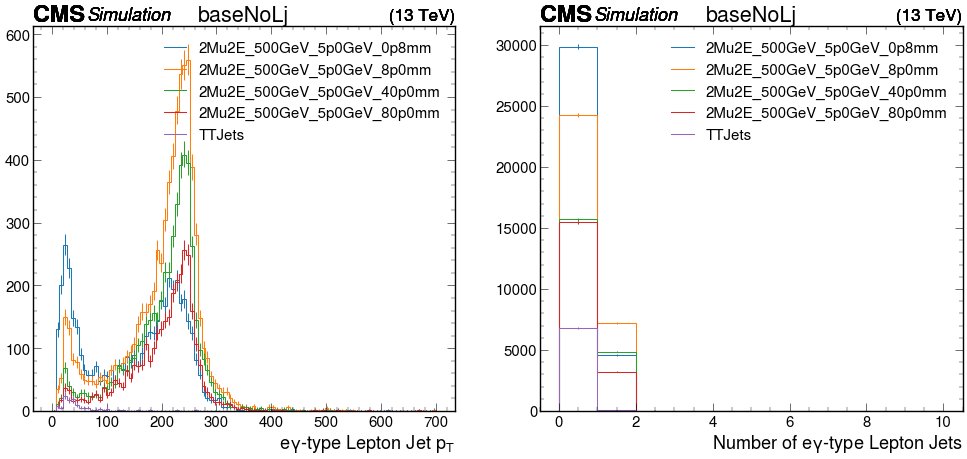

In [4]:
histograms_list = ["egm_lj_pt", "egm_lj_n",]
plot_histograms(samples, histograms_list, "baseNoLj", 2)

Here look a the number of electrons and photons in egm type LJs

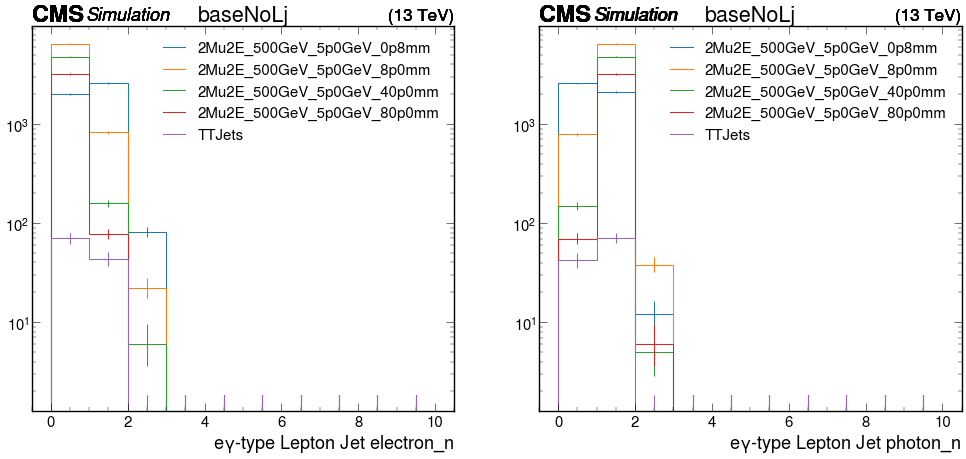

In [5]:
histograms_list = [ "egm_lj_electronN", "egm_lj_photonN",]
plot_histograms(samples, histograms_list, "baseNoLj", 2, log=True)


Here we look at the pT values for all photons and electrons

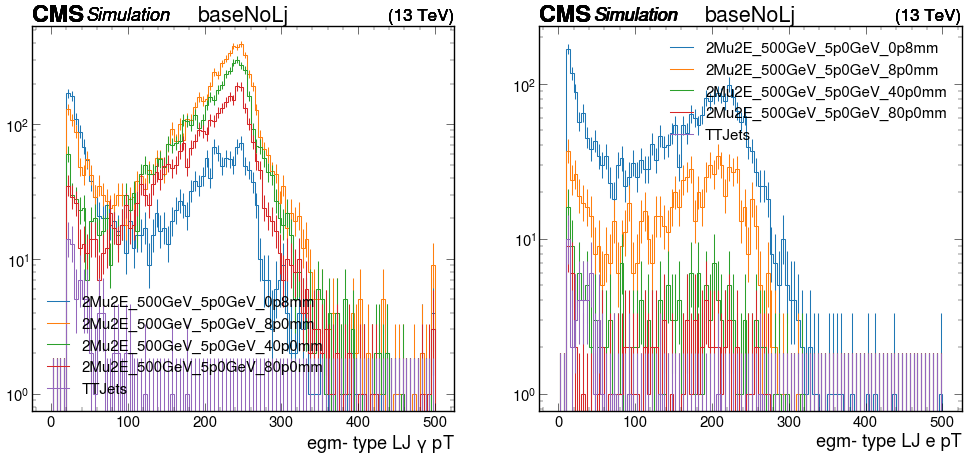

In [6]:
histograms_list = [  "egm_lj_photon_pt", "egm_lj_electron_pt",]
plot_histograms(samples, histograms_list, "baseNoLj", 2, log=True)
#plot_histograms(samples2, histograms_list, "base_ljObjCut")

Here we look at the dxy values for all muons, PF muons and DSA muons

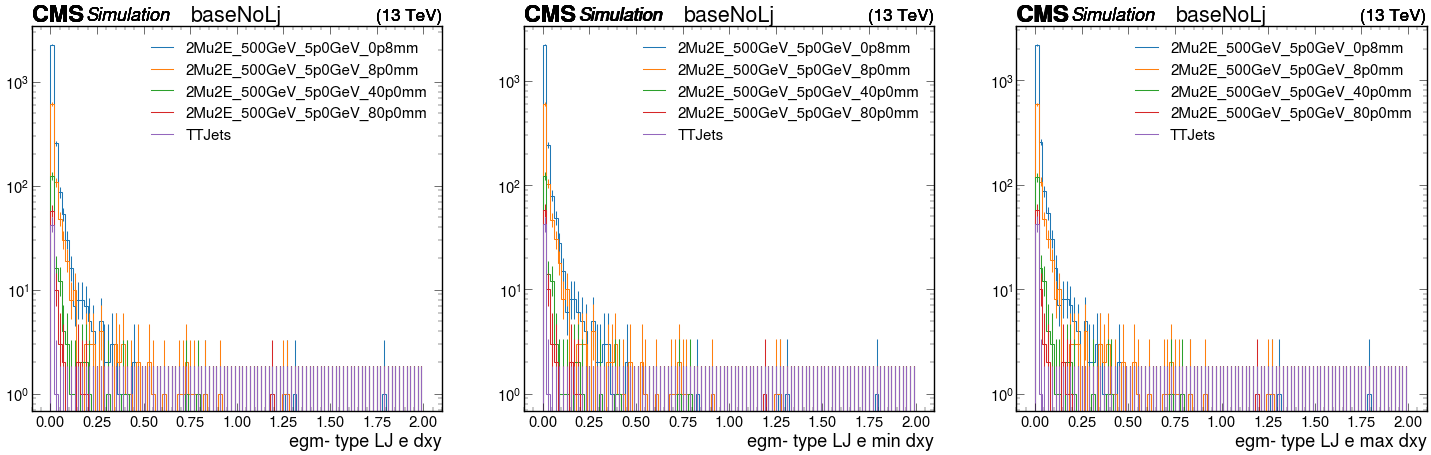

In [7]:
histograms_list = [  "egm_lj_electron_dxy", "egm_lj_electron_min_dxy","egm_lj_electron_max_dxy",]
plot_histograms(samples, histograms_list, "baseNoLj", 3, log=True)
#plot_histograms(samples2, histograms_list, "base_ljObjCut")

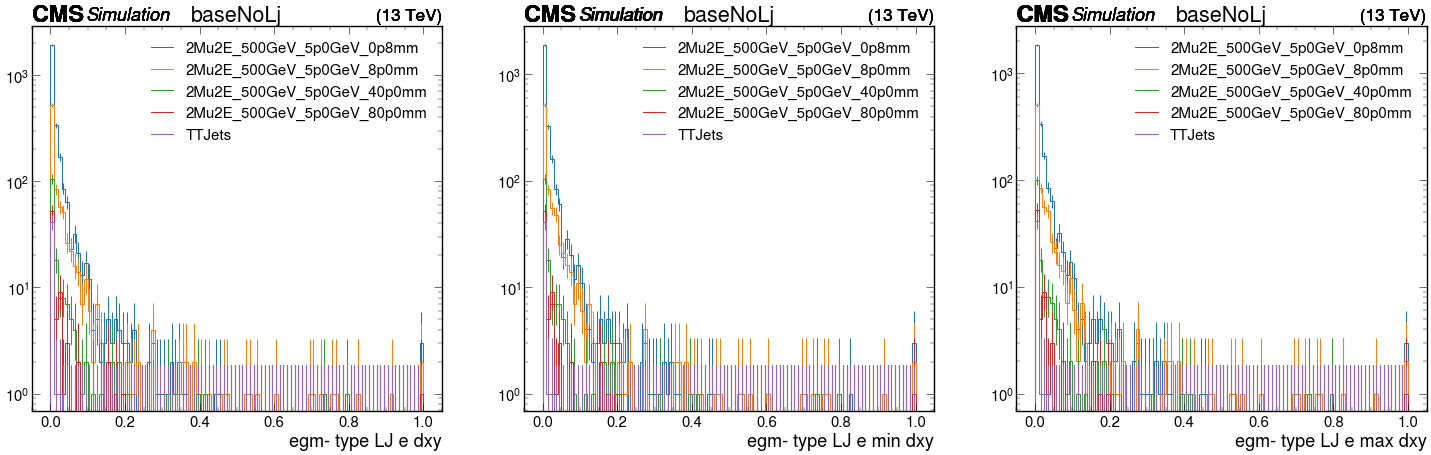

In [8]:
histograms_list = [  "egm_lj_electron_dxy_lowRange", "egm_lj_electron_min_dxy_lowRange","egm_lj_electron_max_dxy_lowRange",]
plot_histograms(samples, histograms_list, "baseNoLj", 3, log=True)
#plot_histograms(samples2, histograms_list, "base_ljObjCut")

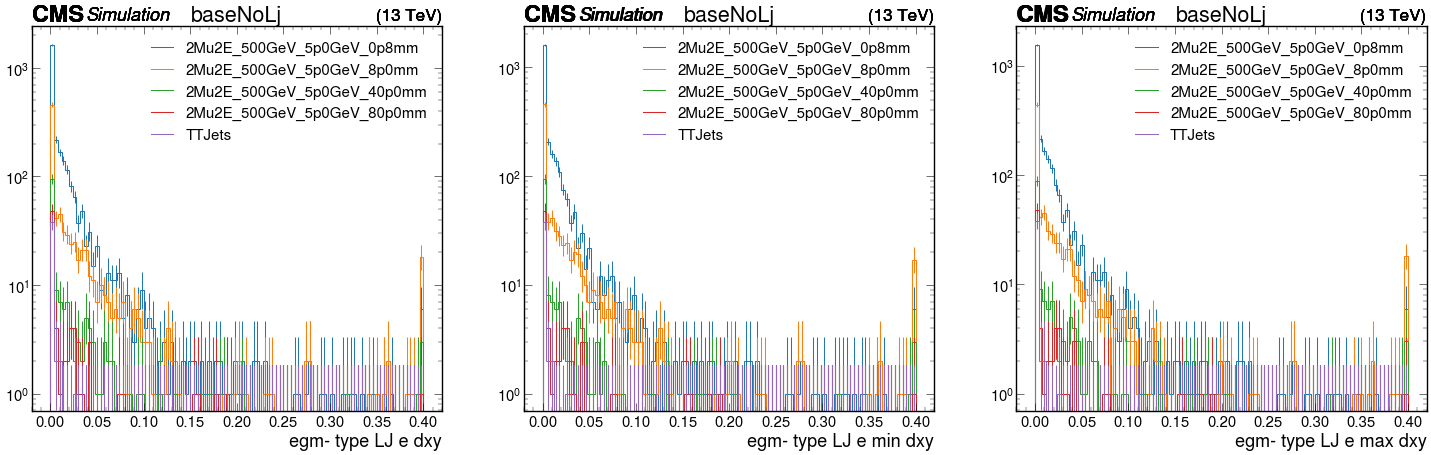

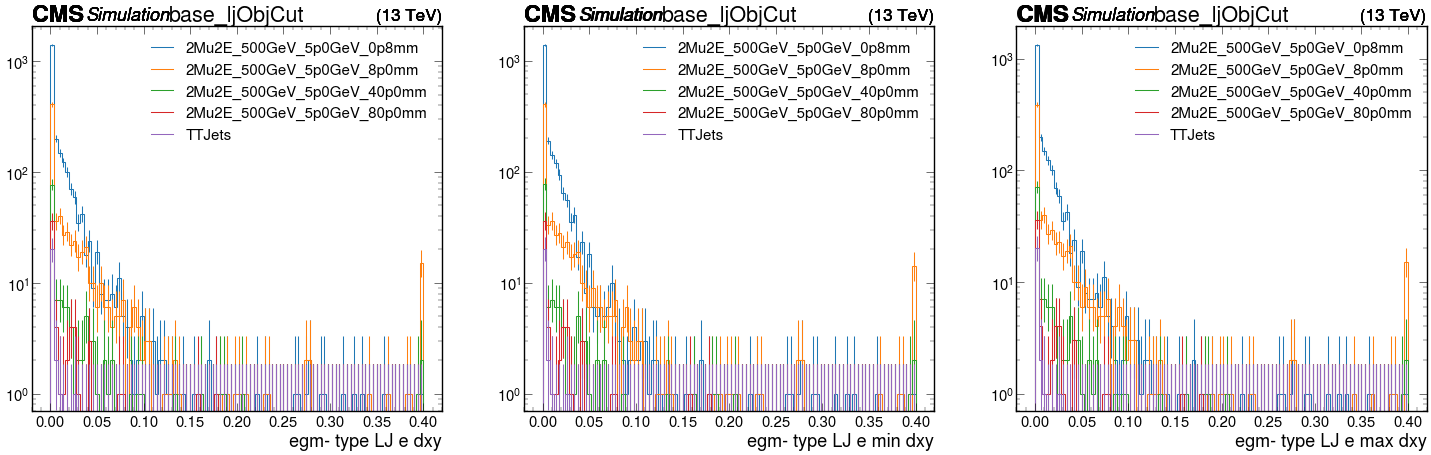

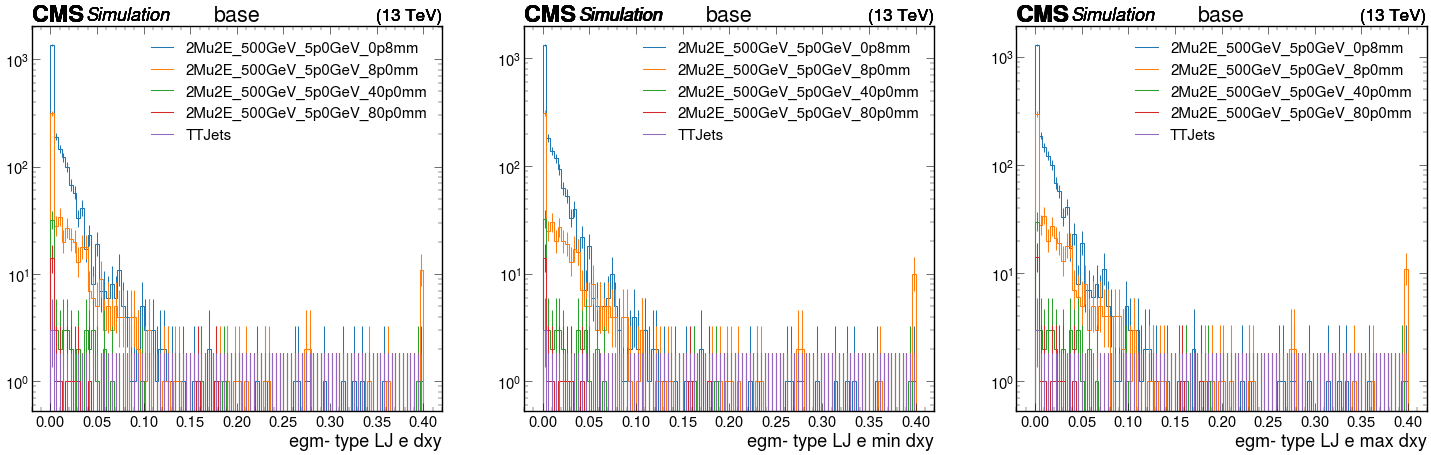

In [9]:
histograms_list = [  "egm_lj_electron_dxy_XLowRange", "egm_lj_electron_min_dxy_XLowRange","egm_lj_electron_max_dxy_XLowRange",]
plot_histograms(samples, histograms_list, "baseNoLj", 3, log=True)
plot_histograms(samples, histograms_list, "base_ljObjCut", 3, log=True)
plot_histograms(samples, histograms_list, "base", 3, log=True)
#plot_histograms(samples2, histograms_list, "base_ljObjCut")

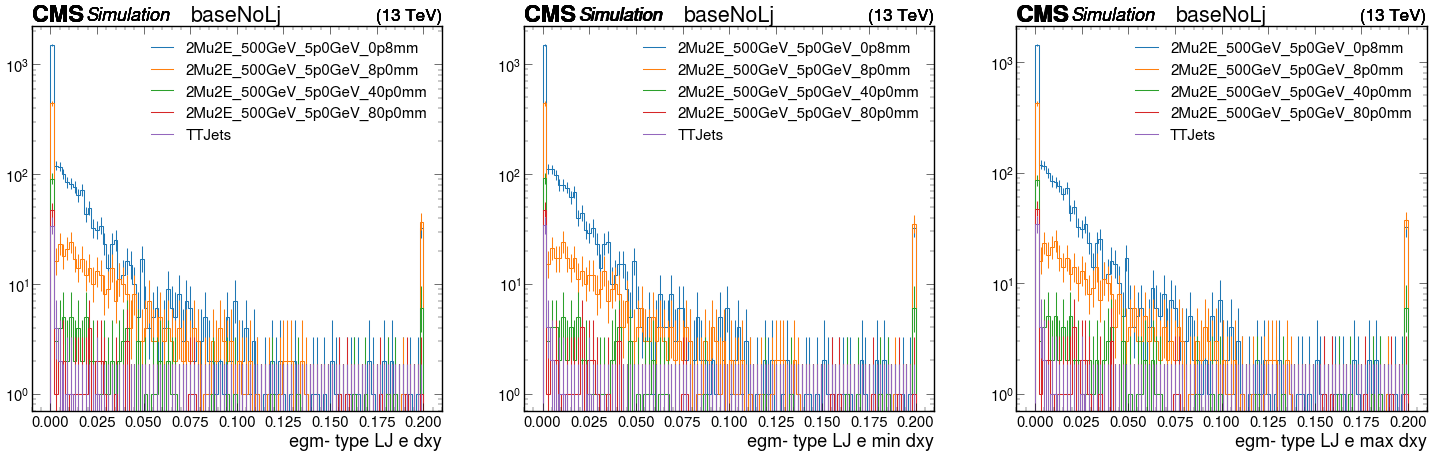

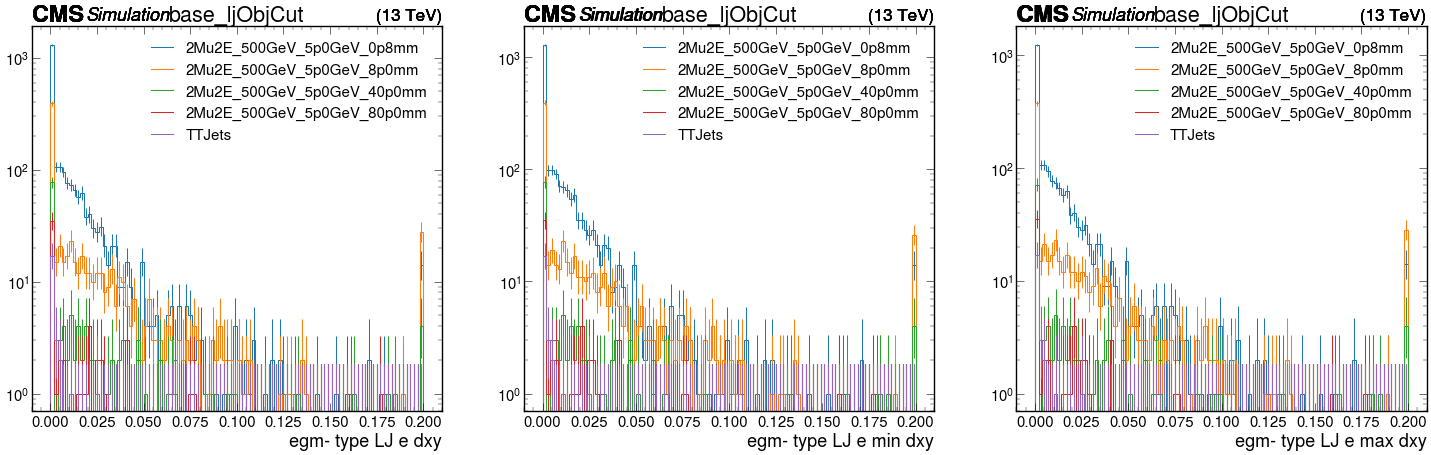

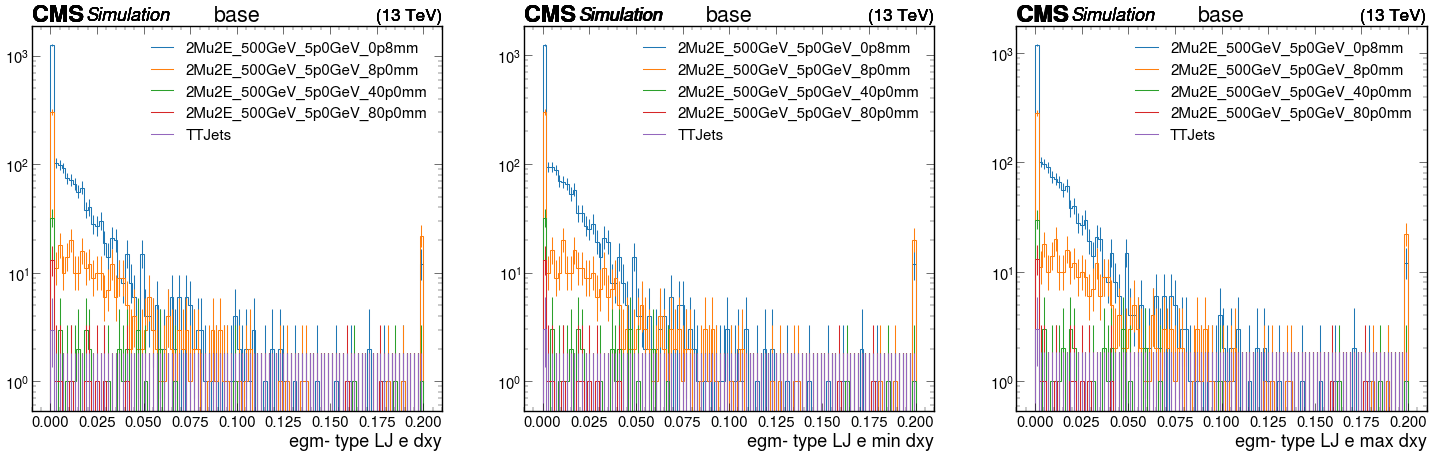

In [10]:
histograms_list = [  "egm_lj_electron_dxy_XXLowRange", "egm_lj_electron_min_dxy_XXLowRange","egm_lj_electron_max_dxy_XXLowRange",]
plot_histograms(samples, histograms_list, "baseNoLj", 3, log=True)
plot_histograms(samples, histograms_list, "base_ljObjCut", 3, log=True)
plot_histograms(samples, histograms_list, "base", 3, log=True)
#plot_histograms(samples2, histograms_list, "base_ljObjCut")

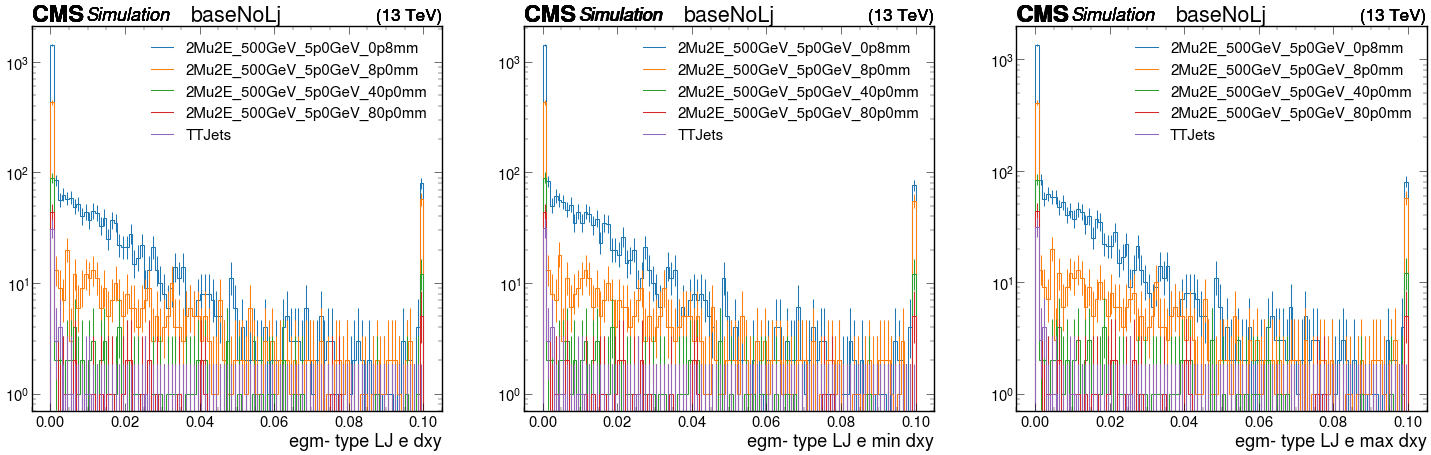

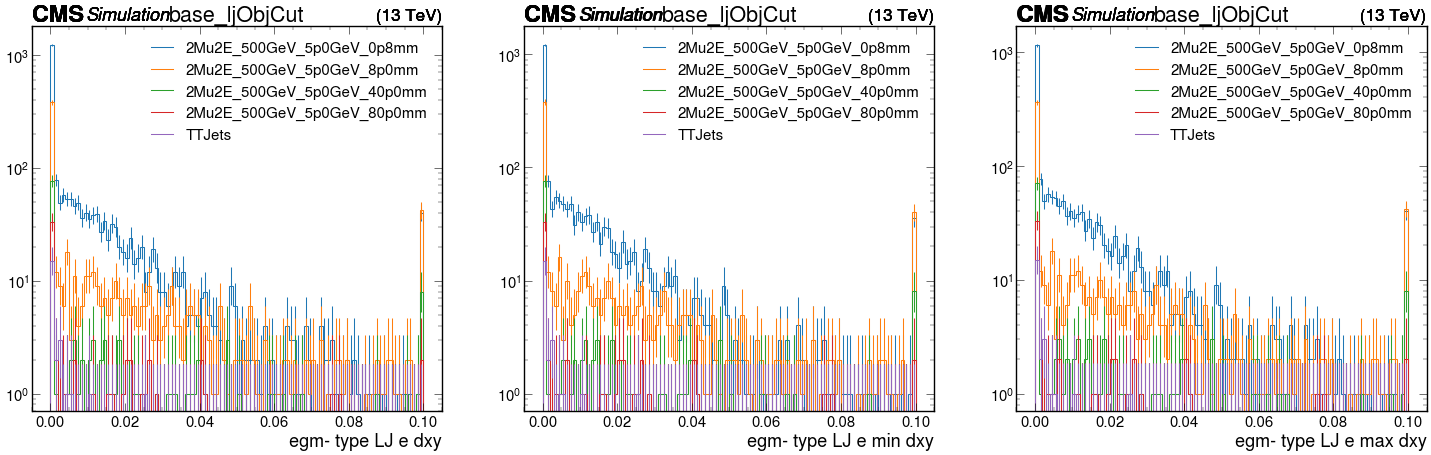

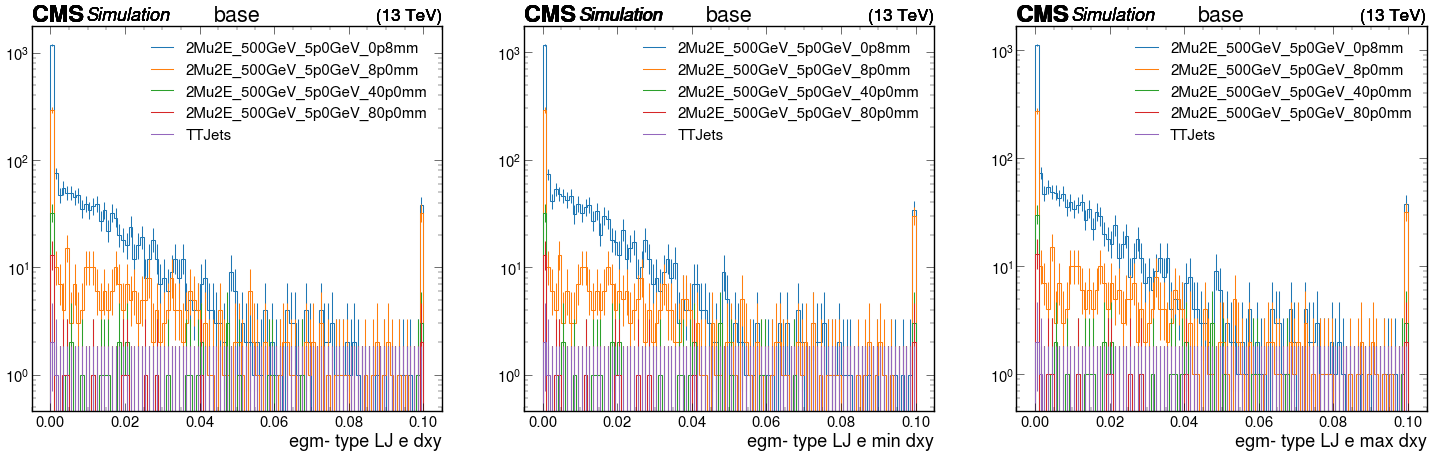

In [11]:
histograms_list = [  "egm_lj_electron_dxy_XXXLowRange", "egm_lj_electron_min_dxy_XXXLowRange","egm_lj_electron_max_dxy_XXXLowRange",]
plot_histograms(samples, histograms_list, "baseNoLj", 3, log=True)
plot_histograms(samples, histograms_list, "base_ljObjCut", 3, log=True)
plot_histograms(samples, histograms_list, "base", 3, log=True)
#plot_histograms(samples2, histograms_list, "base_ljObjCut")

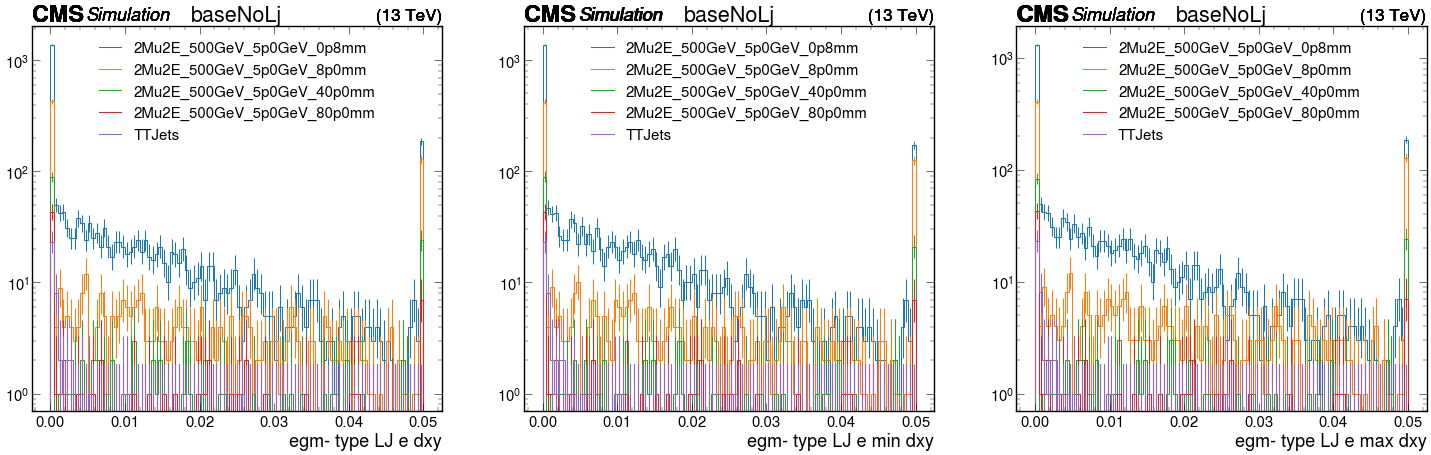

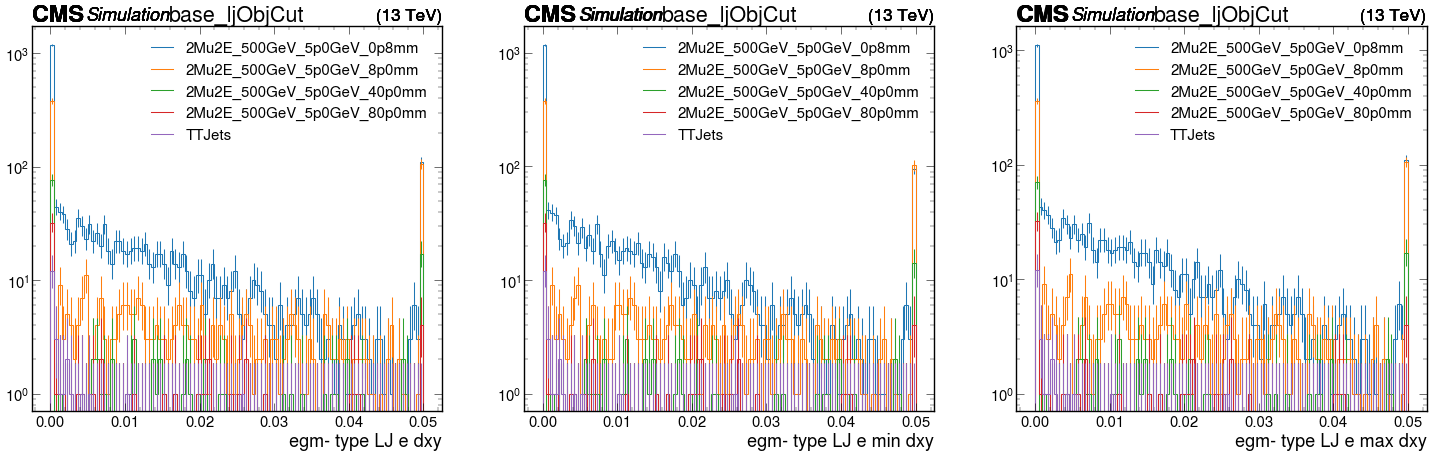

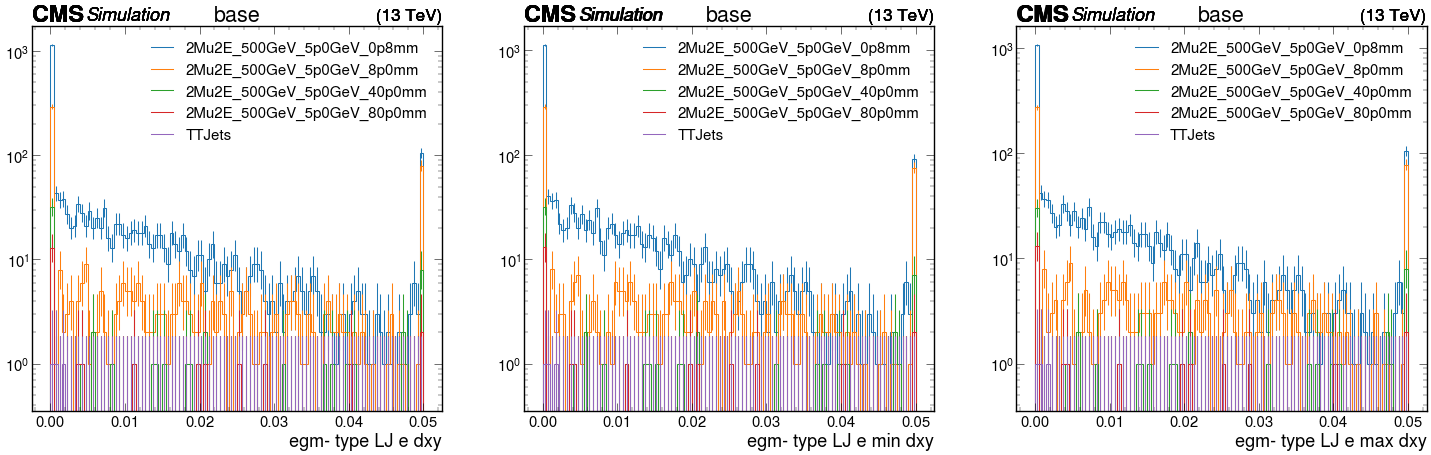

In [12]:
histograms_list = [  "egm_lj_electron_dxy_XXXXLowRange", "egm_lj_electron_min_dxy_XXXXLowRange","egm_lj_electron_max_dxy_XXXXLowRange",]
plot_histograms(samples, histograms_list, "baseNoLj", 3, log=True)
plot_histograms(samples, histograms_list, "base_ljObjCut", 3, log=True)
plot_histograms(samples, histograms_list, "base", 3, log=True)
#plot_histograms(samples2, histograms_list, "base_ljObjCut")

In [13]:
channels = 
plot_channels(samples, [ "baseNoLj_noLoose", "baseNoLj", "base_ljObjCut", "base"],"egm_lj_pt", 4,log=True)
#plot_histograms(samples, histograms_list, "baseNoLj_noLoose", 2,log=True)
#plot_histograms(samples2, histograms_list, "base_ljObjCut")

SyntaxError: invalid syntax (1995929421.py, line 1)